# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
# from sklearn.cross_validation import ShuffleSplit
from sklearn.model_selection import ShuffleSplit
from IPython.display import display
# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset

data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
display(data.head())
# Success
print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)

C:\Python27\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Python27\lib\site-packages\sklearn\learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

Features

- RM: average number of rooms per dwelling
- LSTAT: percentage of population considered lower status
- PTRATIO: pupil-teacher ratio by town

Target Variable 
- MEDV: median value of owner-occupied homes

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [2]:
# TODO: Minimum price of the data
minimum_price = np.min(prices, axis=0)

# TODO: Maximum price of the data
maximum_price = np.max(prices, axis=0)

# TODO: Mean price of the data
mean_price = np.mean(prices, axis=0)

# TODO: Median price of the data
median_price = np.median(prices, axis=0)

# TODO: Standard deviation of prices of the data
std_price = np.std(prices, axis=0)

# Show the calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.

_Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each._  
**Hint:** Would you expect a home that has an `'RM'` value of 6 be worth more or less than a home that has an `'RM'` value of 7?

**Answer: ** 
- **RM** should be **positively** correlated with **MEDV**. Namely, an increase in the value of RM would lead to an increase in the value of MEDV. Because more rooms in a unit suggest more utilities, construction cost and more tenants that can pay for.
- **LSTAT** should be **negatively** correlated with **MEDV**. Since the higher the percentage of working poor homeowners in a neighborhood, the more likely the neighborhood is a low-income community, the overall housing prices in a low-income neighborhood are lower than those in mid-class or high-income communities.
- **PTRATIO** should be **negatively** correlated with **MEDV**. The higher the ratio of students to teachers in primary and secondary schools in the neighborhood, the more likely that the schools are not very good and that the residents in the neighborhoods are among mid- or low-income; hence, the housing prices will be lower. 

----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [19]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |
*Would you consider this model to have successfully captured the variation of the target variable? Why or why not?* 

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [20]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)

Model has a coefficient of determination, R^2, of 0.923.


**Answer:** As taught in the lecture, the higher the R^2 (i.e., the closer the value of R^2 to 1), the better the model fits. 0.923 is really close to 1, hence this model has successfully caputured the variation of the target variable.

****Additional modification:** However, the dataset only contains 5 records so it is hard to conclude that the score is statistically significant; Also, depending on the application of the model, some demanding applications may need even higher than 0.923 for R^2 score to be good enough for implementation.  

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [28]:
# TODO: Import 'train_test_split'
#from sklearn import cross_validation # for version 0.17
# For version 0.18
from sklearn.model_selection import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
# A note on Shuffling:
# "Keep in mind that train_test_split still returns a random split."
# http://scikit-learn.org/0.17/modules/cross_validation.html#random-permutations-cross-validation-a-k-a-shuffle-split

# **Additional Modification for simplification

# X = features, y = prices
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size = 0.20, random_state = 0)

# Success
print "Training and testing split was successful."

Training and testing split was successful.


### Question 3 - Training and Testing
*What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?*  
**Hint:** What could go wrong with not having a way to test your model?

**Answer: **
- Training and testing model on independent datasets could better indicate the performance of the model than training and testing the model on the same dataset.
- Testing on an independent/unseen dataset could show whether the model is overfitting or underfitting the training set.
- A reasonable ratio of splitting dataset would also ensure a sufficient amount of data used to train the model.

----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

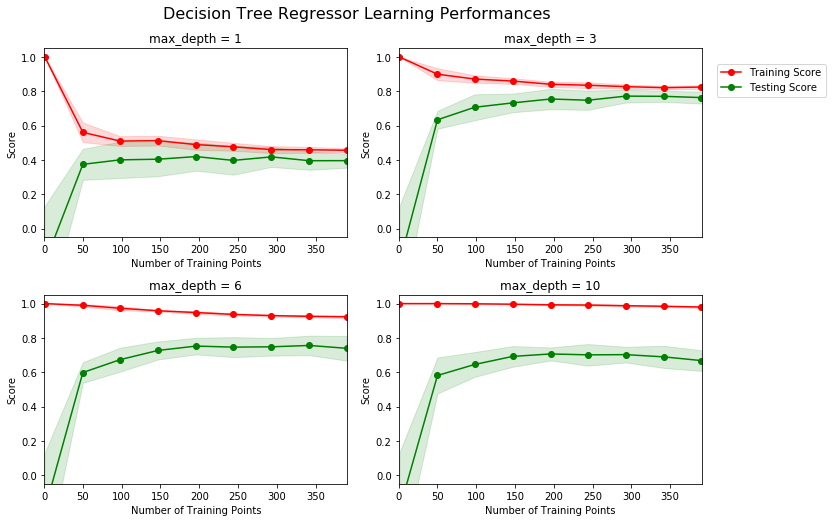

In [19]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
*Choose one of the graphs above and state the maximum depth for the model. What happens to the score of the training curve as more training points are added? What about the testing curve? Would having more training points benefit the model?*  
**Hint:** Are the learning curves converging to particular scores?

**Answer: ** 

In graph, max_depth=6, 

- as more training points are added, the score of the training curve increases in most cases. Especially, when the amount of training points increases from a little above 0 to 50. However, if the max_depth is too low (max_depth=1), the score of the curve of training score might be generally low while the training score would not be getting any better by increasing the max_depth too much (as shown in max_depth = 10).
- as more training points are added, the score of the testing score curve decreases. However, the higher the max_depth, the smaller the decreasing trend of the score of the testing curve. As shown in graph max_depth = 10, the score of the testing curve barely decreases when the number of training points increases.
- In general, having more training points would potentially benefit the model if the max_depth is reasonable.

**** Correction:**

In graph _max_depth=6_, 

- For training score: as more training points are added, the score of the training curve (the red curve) decreases in most cases. However, the higher the max_depth, the smaller the decreasing trend in the training curve. As shown in graph max_depth = 10, the score of the training curve barely decreases when the number of training points increases.


- For testing score: there are two phases in the changes of testing score as the training points are added:
    - From 0 to 150: The testing score curve shows a clear incearse, although the changing rate has considerably reduced after the amount of training points reaches 50. In this phase, additional data points benefit the model.
    - Over 150 and above: The testing score curve seems to stay within the interval of [0.6, 0.8], fluctuating around 0.7. The changing rates also appear subtle; hence, additional points in this phrase do not seem to benefit the model compared to the first phase. 
    

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

Run the code cell below and use this graph to answer the following two questions.

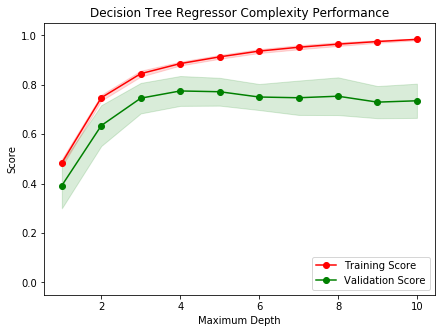

In [20]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
*When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?*  
**Hint:** How do you know when a model is suffering from high bias or high variance?

**Answer: **
- When the model is trained with a maximum depth of 1, the model suffers from high bias because both training and validation scores are low (lower than 0.5).
- When the model is trained with a maximum depth of 10, the model suffers from high variance since the training score is really high, almost 1, indicating overfitting, while the testing score is much lower than the training score, suggesting high variance.


### Question 6 - Best-Guess Optimal Model
*Which maximum depth do you think results in a model that best generalizes to unseen data? What intuition lead you to this answer?*

**Answer: **
- When the max_depth reaches and goes beyond 4, the value of validation score tends to stablize within the interval [0.7, 0.8].
- However, when the max_depth increases, the training score increases, reaching 1.
- Hence, we want to choose max_depth of 4 or 5 to reach a large validating score while not overfitting the training set.

****Additional Modification:**

- However, if applying the Law of Briefness from Occam's Razor, then max_depth = 3 is sufficient enough to give us acceptable scores in both training and validation.

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
*What is the grid search technique and how it can be applied to optimize a learning algorithm?*

**Answer: **
- According to Lesson 10.13 - _GridSearchCV in sklean_, a grid search technique is to use a few lines of code to determine which parameter tune will result in the best performance by "systematically working through multiple combinations of parameter tunes while cross-validating as it goes."
- Given the same training datasets, grid search will identify the best-performed learning algorithm based on the specified scoring method; i.e., the algorithm with the highest score will be the optimal model. 

****Additional Modification:**

- As described above, the nature of grid search is exhaustive given the search that runs through all combinations of parameters; hence, in the case of a complex model with a huge dataset, instead of using the computationally expensive grid search, a randomized search is applied.
- The randomized search ([RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html#sklearn.model_selection.RandomizedSearchCV)) only searchs over a sample of "a fixed number of parameter settings" and determine the winner combination of parameters that yield best performance.
- Example: [Comparing randomized search and grid search for hyperparameter estimation](http://scikit-learn.org/stable/auto_examples/model_selection/randomized_search.html#sphx-glr-auto-examples-model-selection-randomized-search-py)

### Question 8 - Cross-Validation
*What is the k-fold cross-validation training technique? What benefit does this technique provide for grid search when optimizing a model?*  
**Hint:** Much like the reasoning behind having a testing set, what could go wrong with using grid search without a cross-validated set?

**Answer: **
- k-fold cross-validation training is a technique to allow the model to be trained and tested on all the data K times to better assess the performance of the model. 
- In k-fold CV, the training data will be partitioned into k smaller sets and for each of the k sets, the model will be trained on the rest (k-1) of the data and validated on the dataset that is not used in the model-training, resulting in a score, such as R^2 or accuracy rate. Then, the final overall assessment measure is the average score among the K times.
- Since grid search is to find the optimal model based on an assessment score, we want the score to be as accurate as possible. Cross-validation enables grid search to run each combination multiple times, looping through the dataset and using all the training data to train and test. The average score can better represent the performance of each combination to than a score produced by a single training set; hence cross validation enhances the result of grid search.

****External links for additional info:**

- [How to to determine the optimal K value](https://stats.stackexchange.com/questions/27730/choice-of-k-in-k-fold-cross-validation)
- [Choosing among diff. CV methods; higher variance in Leave-One-Out CV](https://stats.stackexchange.com/questions/61783/variance-and-bias-in-cross-validation-why-does-leave-one-out-cv-have-higher-var)

### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

In addition, you will find your implementation is using `ShuffleSplit()` for an alternative form of cross-validation (see the `'cv_sets'` variable). While it is not the K-Fold cross-validation technique you describe in **Question 8**, this type of cross-validation technique is just as useful!. The `ShuffleSplit()` implementation below will create 10 (`'n_splits'`) shuffled sets, and for each shuffle, 20% (`'test_size'`) of the data will be used as the *validation set*. While you're working on your implementation, think about the contrasts and similarities it has to the K-fold cross-validation technique.

Please note that ShuffleSplit has different parameters in scikit-learn versions 0.17 and 0.18.
For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [17]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    # sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
    # sklearn versiin 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
    # cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    cv_sets =ShuffleSplit(n_splits=10, test_size=0.1, random_state=0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor(random_state=0)

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    #params = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
    params = {'max_depth': range(1,11)}
    
    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    # scoring_fnc = make_scorer(r2_score)
    scoring_fnc = make_scorer(performance_metric)
   
    # TODO: Create the grid search object
    grid = GridSearchCV(regressor, params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model
_What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?_  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [21]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

Parameter 'max_depth' is 4 for the optimal model.


**Answer: ** The optimal model has a max. depth of 4. This result justifies the visual judgement in Question 6 where, from the graph 'Decision Tree Regressor Complexity Performance', the validation score reaches a peak as max_depth = 4 while the training score is also reasonably high.

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |
*What price would you recommend each client sell his/her home at? Do these prices seem reasonable given the values for the respective features?*  
**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  

Run the code block below to have your optimized model make predictions for each client's home.

In [24]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price) # i starts from 0

Predicted selling price for Client 1's home: $391,183.33
Predicted selling price for Client 2's home: $189,123.53
Predicted selling price for Client 3's home: $942,666.67


In [25]:
data.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


**Answer: **
- __Client 1__: The predicted price can be used as the recommended price because:
    - **RM = 5** is a little above the min and a little below the 1st quantile of the RM in the dataset, indicating a relatively low house price. 
    - **LSTAT = 17** is almost equal to the 3rd quantile of the LSTAT in the dataset, also suggesting a relatively low price.
    - **PTRATIO = 15** is almost at the mid-point from min value and the 1st quantile of PTRATIO in the dataset, indicating a relatively high housing price.
    - To sum it up, a housing price that reflects the features of a mid-class neighborhood with small family size would be reasonable. The predicted price at \$391,183.33, which is lower than both the mean and median while higher than the 1st quantile, can be a good recommendation.
    
    
- **Client 2**: The predicted price can be used as the recommended price because:
    - **RM = 4** is just a little above the min value of 3.56, suggesting a lower housing price
    - **LSTAT = 32** is almost twice greater than the 3rd quantile and not far from the max value of LSTAT in the whole dataset, indicating a lower price
    - **PTRATIO = 22** is equal to the max value of PTRATIO in the dataset, strongly suggesting a low house price.
    - Overall, all of the three input values are close to the extreme values associated with low prices, and the predicted price of \$189,123.53 is just half stddev larger than the min. value of MEDV, suggesting the prediction is very reasonable.
    
    
- __Client 3__: The predicted price can be used as the recommended price because:
    - **RM = 8** almost reaches the max. value of RM (namely, 8.398) in the dataset, indicating a high housing price
    - **LSTAT = 3** is slightly greater than the min. value of LSTAT by 1 unit, suggesting the most residents are mid-class or higher.
    - **PTRATIO = 12** is even 0.6 unit lower than the min. value of PTRATIO in the dataset, indicating a neighborhood with very high-quality primary and secondary schools.
    - Overall, the predicted price of \$942,666.67 should reasonably reflect the three input features since it is just half stddev lower than the highest median value of owner-occupied homes.

****Additional Modifications: **

Suggestion from Review:
>Another approach to justify whether the predictions are reasonable is to compare the predicted housing prices against houses
with similar features. To do that, we can use sklearn's [KNeighborsRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html).


In [26]:
from sklearn.neighbors import KNeighborsRegressor

client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3
neigh_u=KNeighborsRegressor(n_neighbors=5)
neigh_d = KNeighborsRegressor(n_neighbors=5,weights='distance')
neigh_u.fit(features, prices)
neigh_d.fit(features, prices) 
print "Predictions from decision tree regression:"
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)
print ""
print "When using uniform weights:"
for i, price in enumerate(neigh_u.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)
print ""
print "When using distance weights:"
for i, price in enumerate(neigh_d.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)

Predictions from decision tree regression:
Predicted selling price for Client 1's home: $391,183.33
Predicted selling price for Client 2's home: $189,123.53
Predicted selling price for Client 3's home: $942,666.67

When using uniform weights:
Predicted selling price for Client 1's home: $372,540.00
Predicted selling price for Client 2's home: $162,120.00
Predicted selling price for Client 3's home: $897,120.00

When using distance weights:
Predicted selling price for Client 1's home: $359,701.09
Predicted selling price for Client 2's home: $163,357.55
Predicted selling price for Client 3's home: $874,001.64


When comparing the decision-tree-predicted selling prices with the prices of the houses sharing the most similar features in the original dataset, we can see that our model tends to "overestimate" the selling prices. This overestimation might be caused by the original dataset in which the five nearest neighbors of the given client data might be not as similar as expected. 

However, if we test on 100 additonal clients and the model keeps giving higher selling prices than the two methods in K-nearest neighbors would do, we will have to dig deeper to find out the causes for the overestimation.

### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with the data it's trained on.

In [27]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $411,417.39
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $413,334.78
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $402,531.82
Trial 10: $413,700.00

Range in prices: $29,438.89


### Question 11 - Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

**Answer: **
- __Relevance__: a updated dataset of median housing values should be collected and used to predict the real-world setting in year 2017. The dataset is 40 years older and there might have been several cycles in the housing price in the past 40 years and the quality of schools and demographics in all neighborhoods might also have changed. So a more recent dataset (within 5 years) would be better to predict the real-world setting.


- __Features__: the four features seem to be sufficient, but there might be more features that can more effectively describe the median house price, such as the age of the houses, vacancy rate in the neighborhood and population density.


- __Robustness__: based on the sensitivity of the model, given the same client \#1 data, the model gives 10 different outcomes with a range of 29,438.89 in variability. The standard deviation of the MEDV is 165,171.13, hence the variability of the predicted results is almost 18% of the standard deviation of MEDV. So, the model's predicting power does not seem to be very consistent.


- __Generalizability__: the data collected in an urban city like Boston would not be applicable in a rural city. Boston's housing data might not even be applicable to other urban cities unless the cities with similar features. Rural cities differ in the demographics as well as criteria for school quality (i.e., small student to teacher ratio, caused by small population, might not mean top-tier schools). Hence, the model trained by the Boston data would not be general enough to predict housing prices in a rural city. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.